In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
gpu = pd.read_csv('sgemm_product.csv')
sns.set()

In [3]:
print(gpu.isnull().sum())

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64


In [5]:
print(gpu.shape)

(241600, 18)


In [6]:
gpu['Runtime'] = gpu[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)

gpu = gpu.drop(columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis=1)

gpu.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [9]:
gpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MWG      241600 non-null  int64  
 1   NWG      241600 non-null  int64  
 2   KWG      241600 non-null  int64  
 3   MDIMC    241600 non-null  int64  
 4   NDIMC    241600 non-null  int64  
 5   MDIMA    241600 non-null  int64  
 6   NDIMB    241600 non-null  int64  
 7   KWI      241600 non-null  int64  
 8   VWM      241600 non-null  int64  
 9   VWN      241600 non-null  int64  
 10  STRM     241600 non-null  int64  
 11  STRN     241600 non-null  int64  
 12  SA       241600 non-null  int64  
 13  SB       241600 non-null  int64  
 14  Runtime  241600 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


array([[<AxesSubplot:title={'center':'MWG'}>,
        <AxesSubplot:title={'center':'NWG'}>,
        <AxesSubplot:title={'center':'KWG'}>,
        <AxesSubplot:title={'center':'MDIMC'}>],
       [<AxesSubplot:title={'center':'NDIMC'}>,
        <AxesSubplot:title={'center':'MDIMA'}>,
        <AxesSubplot:title={'center':'NDIMB'}>,
        <AxesSubplot:title={'center':'KWI'}>],
       [<AxesSubplot:title={'center':'VWM'}>,
        <AxesSubplot:title={'center':'VWN'}>,
        <AxesSubplot:title={'center':'STRM'}>,
        <AxesSubplot:title={'center':'STRN'}>],
       [<AxesSubplot:title={'center':'SA'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'Runtime'}>, <AxesSubplot:>]],
      dtype=object)

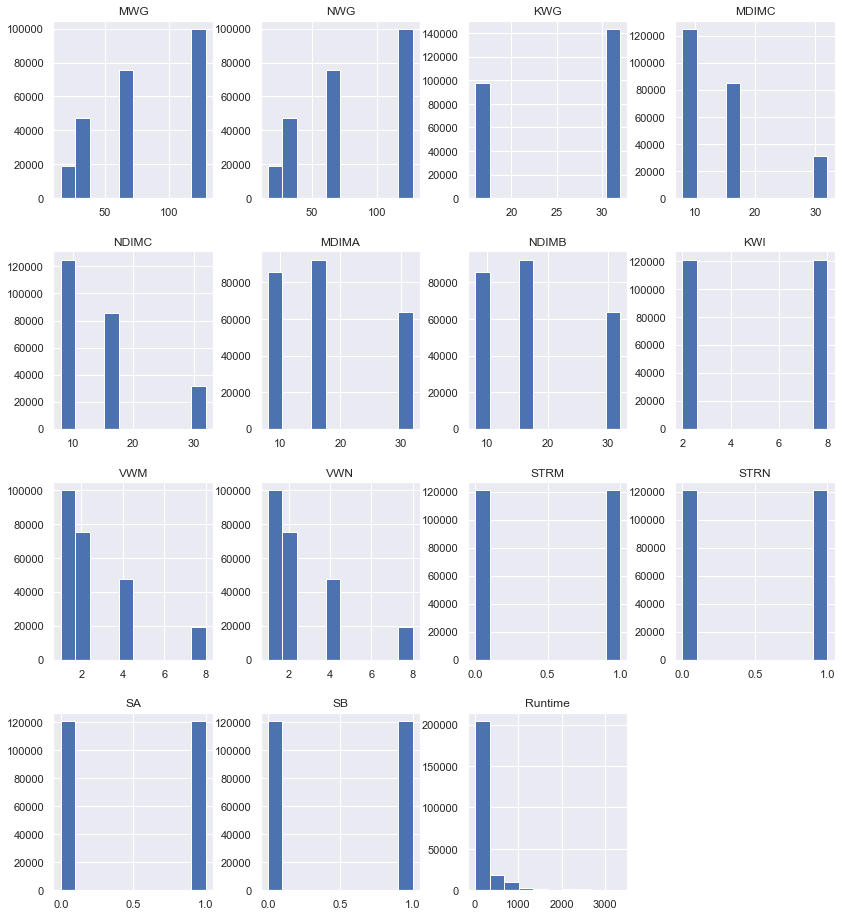

In [10]:
sns.set()

gpu.hist(figsize=(14,16))

In [14]:
gpu.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


<AxesSubplot:xlabel='Runtime'>

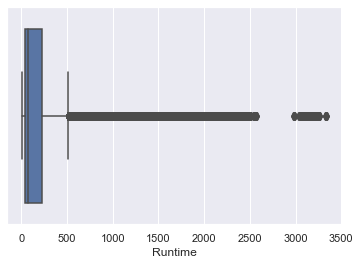

In [15]:
sns.boxplot(x = gpu['Runtime'])

In [16]:
Q1=gpu['Runtime'].quantile(0.25)
Q3=gpu['Runtime'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR
gpu = gpu[(gpu.Runtime>MIN) & (gpu.Runtime<MAX)]
gpu.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


<AxesSubplot:xlabel='Runtime'>

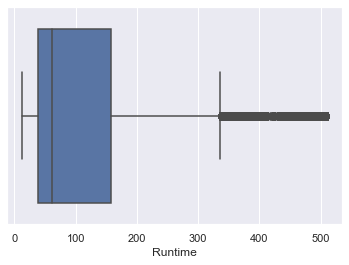

In [18]:
sns.boxplot(x = gpu['Runtime'])

C:\Users\Puli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Runtime', ylabel='Density'>

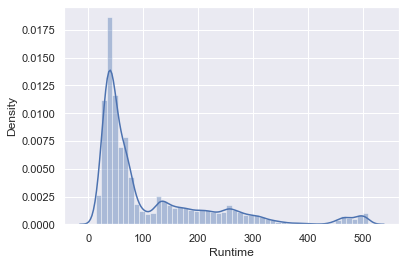

In [19]:
#we can check distribution
sns.distplot(gpu['Runtime'])

<ipython-input-20-fe5e5c6115e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu['target'] = np.log(gpu.Runtime)
C:\Users\Puli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

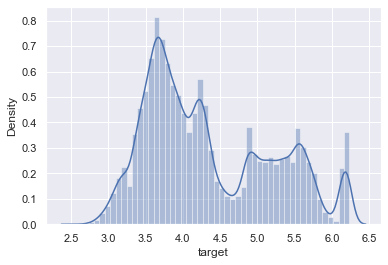

In [20]:
gpu['target'] = np.log(gpu.Runtime)
sns.distplot(gpu['target'])

Text(0.5, 1.0, 'Variable corrrelation')

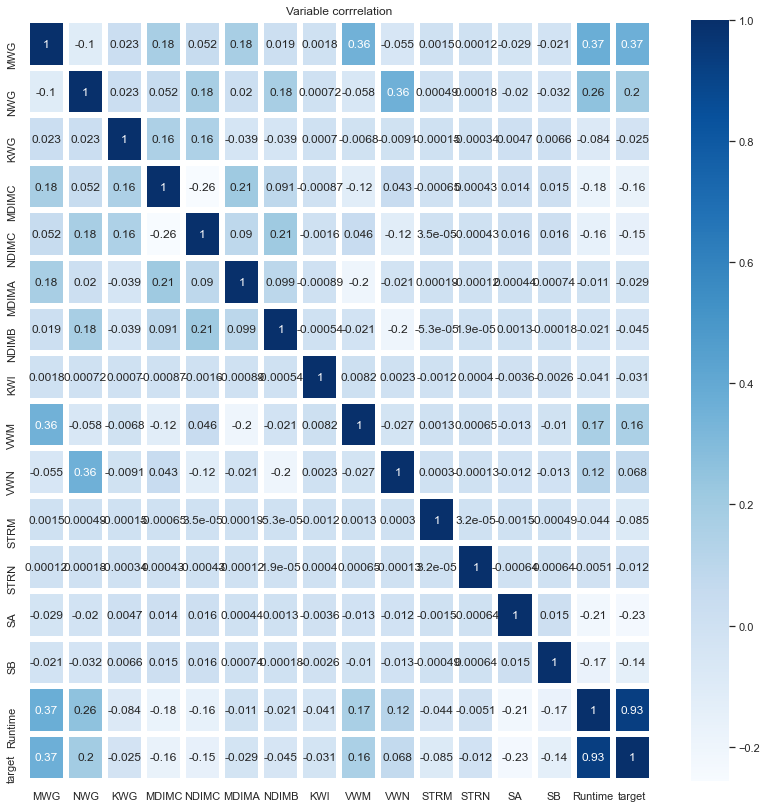

In [22]:
plt.figure(figsize=(14,14))
ax = sns.heatmap(gpu.corr(),annot=True,linewidths=5,cmap=plt.cm.Blues)
plt.title('Variable corrrelation')

In [23]:
gpu_target = gpu[['target']]
Y = gpu_target.to_numpy().ravel()
gpu_features = gpu.drop(columns=['target','Runtime'])
X = gpu_features.to_numpy()

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


MSE with alpha=0.0001: 0.4227773934204636  /  N iterations to converge: 7
MSE with alpha=0.001: 0.42302644899101005  /  N iterations to converge: 7
MSE with alpha=0.01: 0.4271652436098744  /  N iterations to converge: 7
MSE with alpha=0.05: 0.4640019651822485  /  N iterations to converge: 7
MSE with alpha=0.1: 0.5011081578585804  /  N iterations to converge: 7
MSE with alpha=0.2: 0.5520988379885471  /  N iterations to converge: 7
MSE with alpha=0.3: 0.5871810216577966  /  N iterations to converge: 7
MSE with alpha=0.4: 0.6050593665326981  /  N iterations to converge: 7
MSE with alpha=0.5: 0.6217917698229517  /  N iterations to converge: 7
MSE with alpha=0.6: 0.6313802888798391  /  N iterations to converge: 7
MSE with alpha=0.7: 0.6405203396461353  /  N iterations to converge: 7


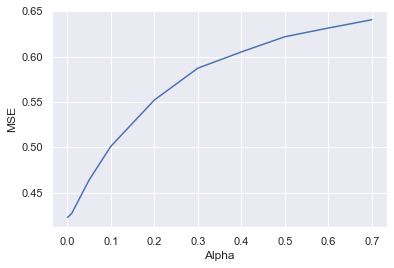

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
list_alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
list_MSE = []

for i in list_alpha:
    regr = SGDRegressor(alpha = i)
    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)
    MSE = mean_squared_error(Y_test, Y_pred)
    list_MSE.append(MSE)
    print(f'MSE with alpha={i}: {MSE}  /  N iterations to converge: {regr.n_iter_}')
    
plt.plot(list_alpha,list_MSE)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()